[参考官方文档](https://docs.python.org/zh-cn/3/tutorial/)

初学过程 begin 2023年4月9日15:00:58

## 循环控制语句

In [9]:
print(b'%(language)s has %(number)03d quote types.' %
      {b'language': b"Python", b"number": 2})

print('C:\some\name')  # here \n means newline! 

print(r'C:\some\name')  # note the r before the quote


b'Python has 002 quote types.'
C:\some
ame
C:\some\name
0b1100100


In [4]:
from decimal import Decimal
from datetime import datetime

name = "Fred"
f"He said his name is {name!r}."

f"He said his name is {repr(name)}."  # repr() is equivalent to !r

width = 10
precision = 4
value = Decimal("12.34567")
f"result: {value:{width}.{precision}}"  # nested fields

today = datetime(year=2017, month=1, day=27)
print(f"{today:%B %d, %Y}")  # using date format specifier

f"{today=:%B %d, %Y}" # using date format specifier and debugging

number = 1024
f"{number:#0x}"  # using integer format specifier

foo = "bar"
f"{ foo = }" # preserves whitespace

line = "The mill's closed"
f"{line = }"

f"{line = :20}"

f"{line = !r:20}"

January 27, 2017


'line = "The mill\'s closed" '

### while 语句

In [ ]:
# Fibonacci series:
# the sum of two elements defines the next
a, b = 0, 1
while a < 10:
    print(a)
    a, b = b, a+b

### if elif

In [ ]:
x = int(input("Please enter an integer: "))

if x < 0:
    x = 0
    print('Negative changed to zero')
elif x == 0:
    print('Zero')
elif x == 1:
    print('Single')
else:
    print('More')

### for 循环

In [1]:
# Measure some strings:
words = ['cat', 'window', 'defenestrate']
for w in words:
    print(w, len(w))

cat 3
window 6
defenestrate 12


### match case 

In [3]:
def http_error(status):
    match status:
        case 400:
            return "Bad request"
        case 404:
            return "Not found"
        case 418:
            return "I'm a teapot"
        case _:
            return "Something's wrong with the internet"

http_error('a')            

"Something's wrong with the internet"

In [10]:
# point is an (x, y) tuple
point = (0, 0)
match point:
    case (0, 0):
        print("Origin")
    case (0, y):
        print(f"Y={y}")
    case (x, 0):
        print(f"X={x}")
    case (x, y):
        print(f"X={x}, Y={y}")
    case _:
        # raise ValueError("Not a point")
        print("Not a point")

Origin


In [17]:
match points:
    case []:
        print("No points")
    case [Point(0, 0)]:
        print("The origin")
    case [Point(x, y)]:
        print(f"Single point {x}, {y}")
    case [Point(0, y1), Point(0, y2)]:
        print(f"Two on the Y axis at {y1}, {y2}")
    case _:
        print("Something else")


NameError: name 'points' is not defined

## 定义函数

In [22]:
def fib(n):    # write Fibonacci series up to n
    """Print a Fibonacci series up to n."""
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()

# Now call the function we just defined:
fib(2000)


print(fib)
f = fib
f(100)

print(fib(0))

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 
<function fib at 0x7feec24cf400>
0 1 1 2 3 5 8 13 21 34 55 89 

None


In [25]:
def ask_ok(prompt, retries=4, reminder='Please try again!'):
    while True:
        ok = input(prompt)
        if ok in ('y', 'ye', 'yes'):
            return True
        if ok in ('n', 'no', 'nop', 'nope'):
            return False
        retries = retries - 1
        if retries < 0:
            raise ValueError('invalid user response')
        print(reminder)

# ask_ok('Do you really want to quit?')

ask_ok('OK to overwrite the file?', 1)

# ask_ok('OK to overwrite the file?', 2, 'Come on, only yes or no!')

True

In [26]:
i = 5

def f(arg=i):
    print(arg)

i = 6
f()


5


In [28]:
def f(a, L=[]):
    L.append(a)
    return L

print(f(1))
print(f(1))
print(f(2))
print(f(3))

[1]
[1, 1]
[1, 1, 2]
[1, 1, 2, 3]


In [29]:
def f(a, L=None):
    if L is None:
        L = []
    L.append(a)
    return L

print(f(1))
print(f(2))
print(f(3))    

[1]
[2]
[3]


In [30]:
def function(a):
    pass

function(0, a=0)

TypeError: function() got multiple values for argument 'a'

### 函数参数类型指定
最后一个形参为 **name 形式时，接收一个字典（详见 映射类型 --- dict），该字典包含与函数中已定义形参对应之外的所有关键字参数。**name 形参可以与 *name 形参（下一小节介绍）组合使用（*name 必须在 **name 前面）， *name 形参接收一个 元组，该元组包含形参列表之外的位置参数。

In [31]:
def cheeseshop(kind, *arguments, **keywords):
    print("-- Do you have any", kind, "?")
    print("-- I'm sorry, we're all out of", kind)
    for arg in arguments:
        print(arg)
    print("-" * 40)
    for kw in keywords:
        print(kw, ":", keywords[kw])

cheeseshop("Limburger", "It's very runny, sir.",
           "It's really very, VERY runny, sir.",
           shopkeeper="Michael Palin",
           client="John Cleese",
           sketch="Cheese Shop Sketch")        

-- Do you have any Limburger ?
-- I'm sorry, we're all out of Limburger
It's very runny, sir.
It's really very, VERY runny, sir.
----------------------------------------
shopkeeper : Michael Palin
client : John Cleese
sketch : Cheese Shop Sketch


可变参数
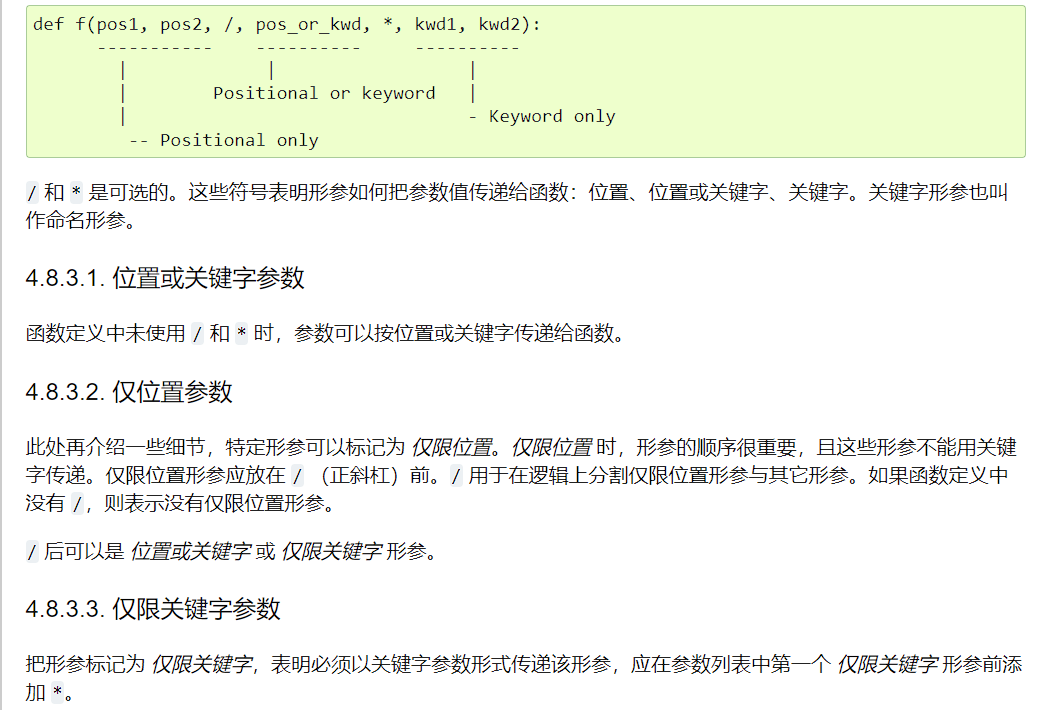

In [36]:
def foo(name, /, **kwds):
    return 'name' in kwds

foo(1, **{'name': 2})
# foo(1, name = 2, nm = 3)

True

In [38]:
def concat(*args, sep="/"):
    return sep.join(args)

# concat(a="earth", b="mars", c="venus")

concat("earth", "mars", "venus")

'earth/mars/venus'

参数解包

In [44]:
print(list(range(0, 6)))      # normal call with separate arguments

args = [3, 6]
print(list(range(*args)))          # call with arguments unpacked from a list


[0, 1, 2, 3, 4, 5]
[3, 4, 5]


lamda表达式

In [48]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)

f(10)

52

In [58]:
pairs = [(1, 'one'), (8, 'eight'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
print(pairs)
pairs.sort(key=lambda pair: pair[0])
print(pairs)

[(8, 'eight'), (4, 'four'), (1, 'one'), (3, 'three')]
[(1, 'one'), (3, 'three'), (4, 'four'), (8, 'eight')]


In [1]:
def my_function():
    """Do nothing, but document it.

    No, really, it doesn't do anything.
    """
    pass

print(my_function.__doc__)


Do nothing, but document it.

    No, really, it doesn't do anything.
    
